In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, label_binarize
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import SMOTE
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
import xgboost as xgb
from sklearn.metrics import roc_curve, auc, make_scorer, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, plot_confusion_matrix, classification_report, average_precision_score
from sklearn.metrics import roc_auc_score, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

from itertools import cycle
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from scipy import stats, interp
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

## Objective

The objective of this project is to analyze a public dataset of customers from a telecom company and predict whether a customer will switch to another company, thereby increasing profitability. 

## Dataset Description

- This project utilizes a public dataset of 66,469 customers from an anonymous telecommunications company.
- The goal of the project is to predict customer churn and increase profitability for the company.
- Data preprocessing and cleaning techniques were used on 66 features before moving to the modelling phase.

In [3]:
data = pd.read_excel("mobile-churn-data.xlsx")

In [4]:
data.head()

,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
0,2013,6,13,1000,0,1,0.05,0.00,1,1,...,75.27,0.00,63.43,0.00,210,1,84,0,0.0,0
1,2013,6,14,1000,0,25,28.31,3.45,1,0,...,13.38,11.18,2.00,11.18,0,0,0,0,0.0,0
2,2013,6,18,1005,0,8,15.62,1.97,1,0,...,30.00,0.00,0.00,10.45,0,0,0,0,0.0,0
3,2013,6,27,1013,0,11,5.62,0.00,1,0,...,0.00,0.00,0.00,0.00,0,0,0,0,0.0,1
4,2013,6,32,1032,0,2,5.86,0.15,1,0,...,2.58,0.00,1.00,0.00,0,0,0,0,0.0,0


In [5]:
data.describe()

,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
count,66469.0,66469.000000,6.646900e+04,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,...,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000
mean,2013.0,6.256721,5.948572e+05,4006.037867,0.040365,63.975718,9.645420,6.845812,0.804450,0.603229,...,98.757451,1.023373,66.910263,3.037600,101.418105,7.318630,62.272684,3.062616,5.931800,0.209225
std,0.0,0.662637,4.292423e+05,6058.350935,0.196815,264.006882,18.473371,14.512993,0.396626,0.489232,...,193.659214,7.409313,149.067804,19.771915,263.280424,35.573779,185.571343,25.071290,76.366818,0.406759
min,2013.0,6.000000,1.300000e+01,0.000000,0.000000,0.000000,0.000000,-30.060000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,6.000000,2.501070e+05,457.000000,0.000000,1.000000,0.040000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.0,6.000000,4.135120e+05,1216.000000,0.000000,2.000000,5.270000,2.280000,1.000000,1.000000,...,30.880000,0.000000,15.480000,0.000000,14.000000,0.000000,5.000000,0.000000,0.000000,0.000000
75%,2013.0,6.000000,1.041120e+06,1985.000000,0.000000,8.000000,12.920000,8.110000,1.000000,1.000000,...,111.650000,0.000000,69.980000,0.000000,96.000000,1.000000,51.000000,0.000000,0.000000,0.000000
max,2013.0,8.000000,1.196944e+06,15947.000000,1.000000,1307.000000,1775.710000,1236.470000,1.000000,1.000000,...,4953.120000,473.250000,4772.370000,1149.120000,18637.000000,2829.000000,13860.000000,4692.000000,5571.220000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66469 entries, 0 to 66468
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   year                                        66469 non-null  int64  
 1   month                                       66469 non-null  int64  
 2   user_account_id                             66469 non-null  int64  
 3   user_lifetime                               66469 non-null  int64  
 4   user_intake                                 66469 non-null  int64  
 5   user_no_outgoing_activity_in_days           66469 non-null  int64  
 6   user_account_balance_last                   66469 non-null  float64
 7   user_spendings                              66469 non-null  float64
 8   user_has_outgoing_calls                     66469 non-null  int64  
 9   user_has_outgoing_sms                       66469 non-null  int64  
 10  user_use_g

# Data Preprocessing

### CHECKING FOR NULL VALUES

In [7]:
# Checking for null values 
print(data.isnull().sum().sum())

print("THERE ARE NO NULL VALUES")

0
THERE ARE NO NULL VALUES


--------------------------------------------

### CHECKING YEAR COLUMN

In [8]:
data['year'].value_counts()

2013    66469
Name: year, dtype: int64

#### WE WILL DROP THE YEAR COLUMN AS IT ONLY CONSISTS OF A SINGULAR VALUE THAT IS 2013

In [9]:
data.drop('year',inplace=True, axis =1)

--------------------------------

### CHECKING USER ACCOUNT ID COLUMN 

In [10]:
data['user_account_id']

0             13
1             14
2             18
3             27
4             32
          ...   
66464    1196937
66465    1196938
66466    1196939
66467    1196940
66468    1196944
Name: user_account_id, Length: 66469, dtype: int64

#### AS USER ACCOUNT ID IS UNIQUE FOR EVERY CUSTOMER AND WILL NOT CONTRIBUTE TOWARDS OUR PREDICTION THEREFORE WE WILL DROP IT

In [11]:
data.drop('user_account_id',inplace=True, axis =1)

----------------------------------

### CHECKING FOR CORRELATION

In [12]:
data.corr()

,month,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,user_use_gprs,user_does_reload,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
month,1.000000,0.670438,0.213441,-0.085852,-0.171936,-0.151566,-0.477995,-0.381315,-0.032080,0.341644,...,-0.189200,-0.050010,-0.167752,-0.056081,-0.141744,-0.075731,-0.122698,-0.044493,-0.019019,0.476116
user_lifetime,0.670438,1.000000,0.124386,0.314474,-0.219765,-0.220332,-0.648572,-0.534862,-0.081538,0.074515,...,-0.251465,-0.066062,-0.222710,-0.074264,-0.190805,-0.102034,-0.168767,-0.059954,-0.037494,0.529719
user_intake,0.213441,0.124386,1.000000,-0.041898,0.013073,0.019359,0.091288,0.090708,0.091401,0.175389,...,-0.073481,-0.016039,-0.070169,-0.018708,-0.050984,-0.027395,-0.040466,-0.015998,0.008617,-0.014725
user_no_outgoing_activity_in_days,-0.085852,0.314474,-0.041898,1.000000,-0.098636,-0.111340,-0.460601,-0.285890,-0.049772,-0.259467,...,-0.119738,-0.032275,-0.105498,-0.035967,-0.090831,-0.048533,-0.079034,-0.028691,-0.018174,0.222895
user_account_balance_last,-0.171936,-0.219765,0.013073,-0.098636,1.000000,0.174589,0.187376,0.171040,0.050792,0.048383,...,0.154005,0.149941,0.108075,0.177588,0.034485,0.036361,0.025281,0.060304,0.198106,-0.178921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
last_100_sms_outgoing_to_onnet_count,-0.075731,-0.102034,-0.027395,-0.048533,0.036361,0.145103,0.095250,0.159339,0.067636,0.100515,...,0.126281,0.012113,0.131898,0.014260,0.308328,1.000000,0.144752,0.035999,0.055029,-0.089464
last_100_sms_outgoing_to_offnet_count,-0.122698,-0.168767,-0.040466,-0.079034,0.025281,0.356207,0.155355,0.253473,0.091714,0.173922,...,0.174440,0.017490,0.173329,0.014544,0.887187,0.144752,1.000000,0.291214,0.073265,-0.135022
last_100_sms_outgoing_to_abroad_count,-0.044493,-0.059954,-0.015998,-0.028691,0.060304,0.137700,0.054983,0.092850,0.023950,0.057913,...,0.079509,0.214701,0.039252,0.285202,0.346189,0.035999,0.291214,1.000000,0.045440,-0.051195
last_100_gprs_usage,-0.019019,-0.037494,0.008617,-0.018174,0.198106,0.245481,0.033963,0.045829,0.276856,0.043556,...,0.107679,0.084114,0.063750,0.124258,0.092179,0.055029,0.073265,0.045440,1.000000,-0.026421


In [13]:
# FUNCTION FOR CORRELATION HEATMAP

def heatmap_corr(df, fig=20, annot=False, filtering=None, sort=True):

    if sort == True:
        cols1=[]
        cols2=[]
        value=[]
        matrix = df.corr()
        for i in range(len(matrix.columns)):
            for j in range(i):
                cols1.append(matrix.columns[i])
                cols2.append(matrix.columns[j])
                value.append(matrix.iloc[i,j])
        new_df = pd.DataFrame({'column_name_1': cols1, 'column_name_2': cols2, 'corr':value})
        new_df.sort_values('corr',ascending=False, inplace=True)
        if filtering != None:
            new_df = new_df[(abs(new_df['corr']) >= filtering)]
        all_cols = []
        cols = []
        for index, row in new_df.iterrows():
            all_cols.append(row.column_name_1)
            all_cols.append(row.column_name_2)
        for col in all_cols:
            if col not in cols:
                cols.append(col)
        final = df[cols]
    else:
        final = df.copy()
    _ , ax = plt.subplots(figsize =(fig, fig))
    colormap = sns.diverging_palette(240, 10,n=9, as_cmap = True)
    _ = sns.heatmap(
        final.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=annot, 
        linewidths=0.1,
        vmin=-1, 
        vmax=1.0, 
        linecolor='white',
        annot_kws={'fontsize':8 }
    )

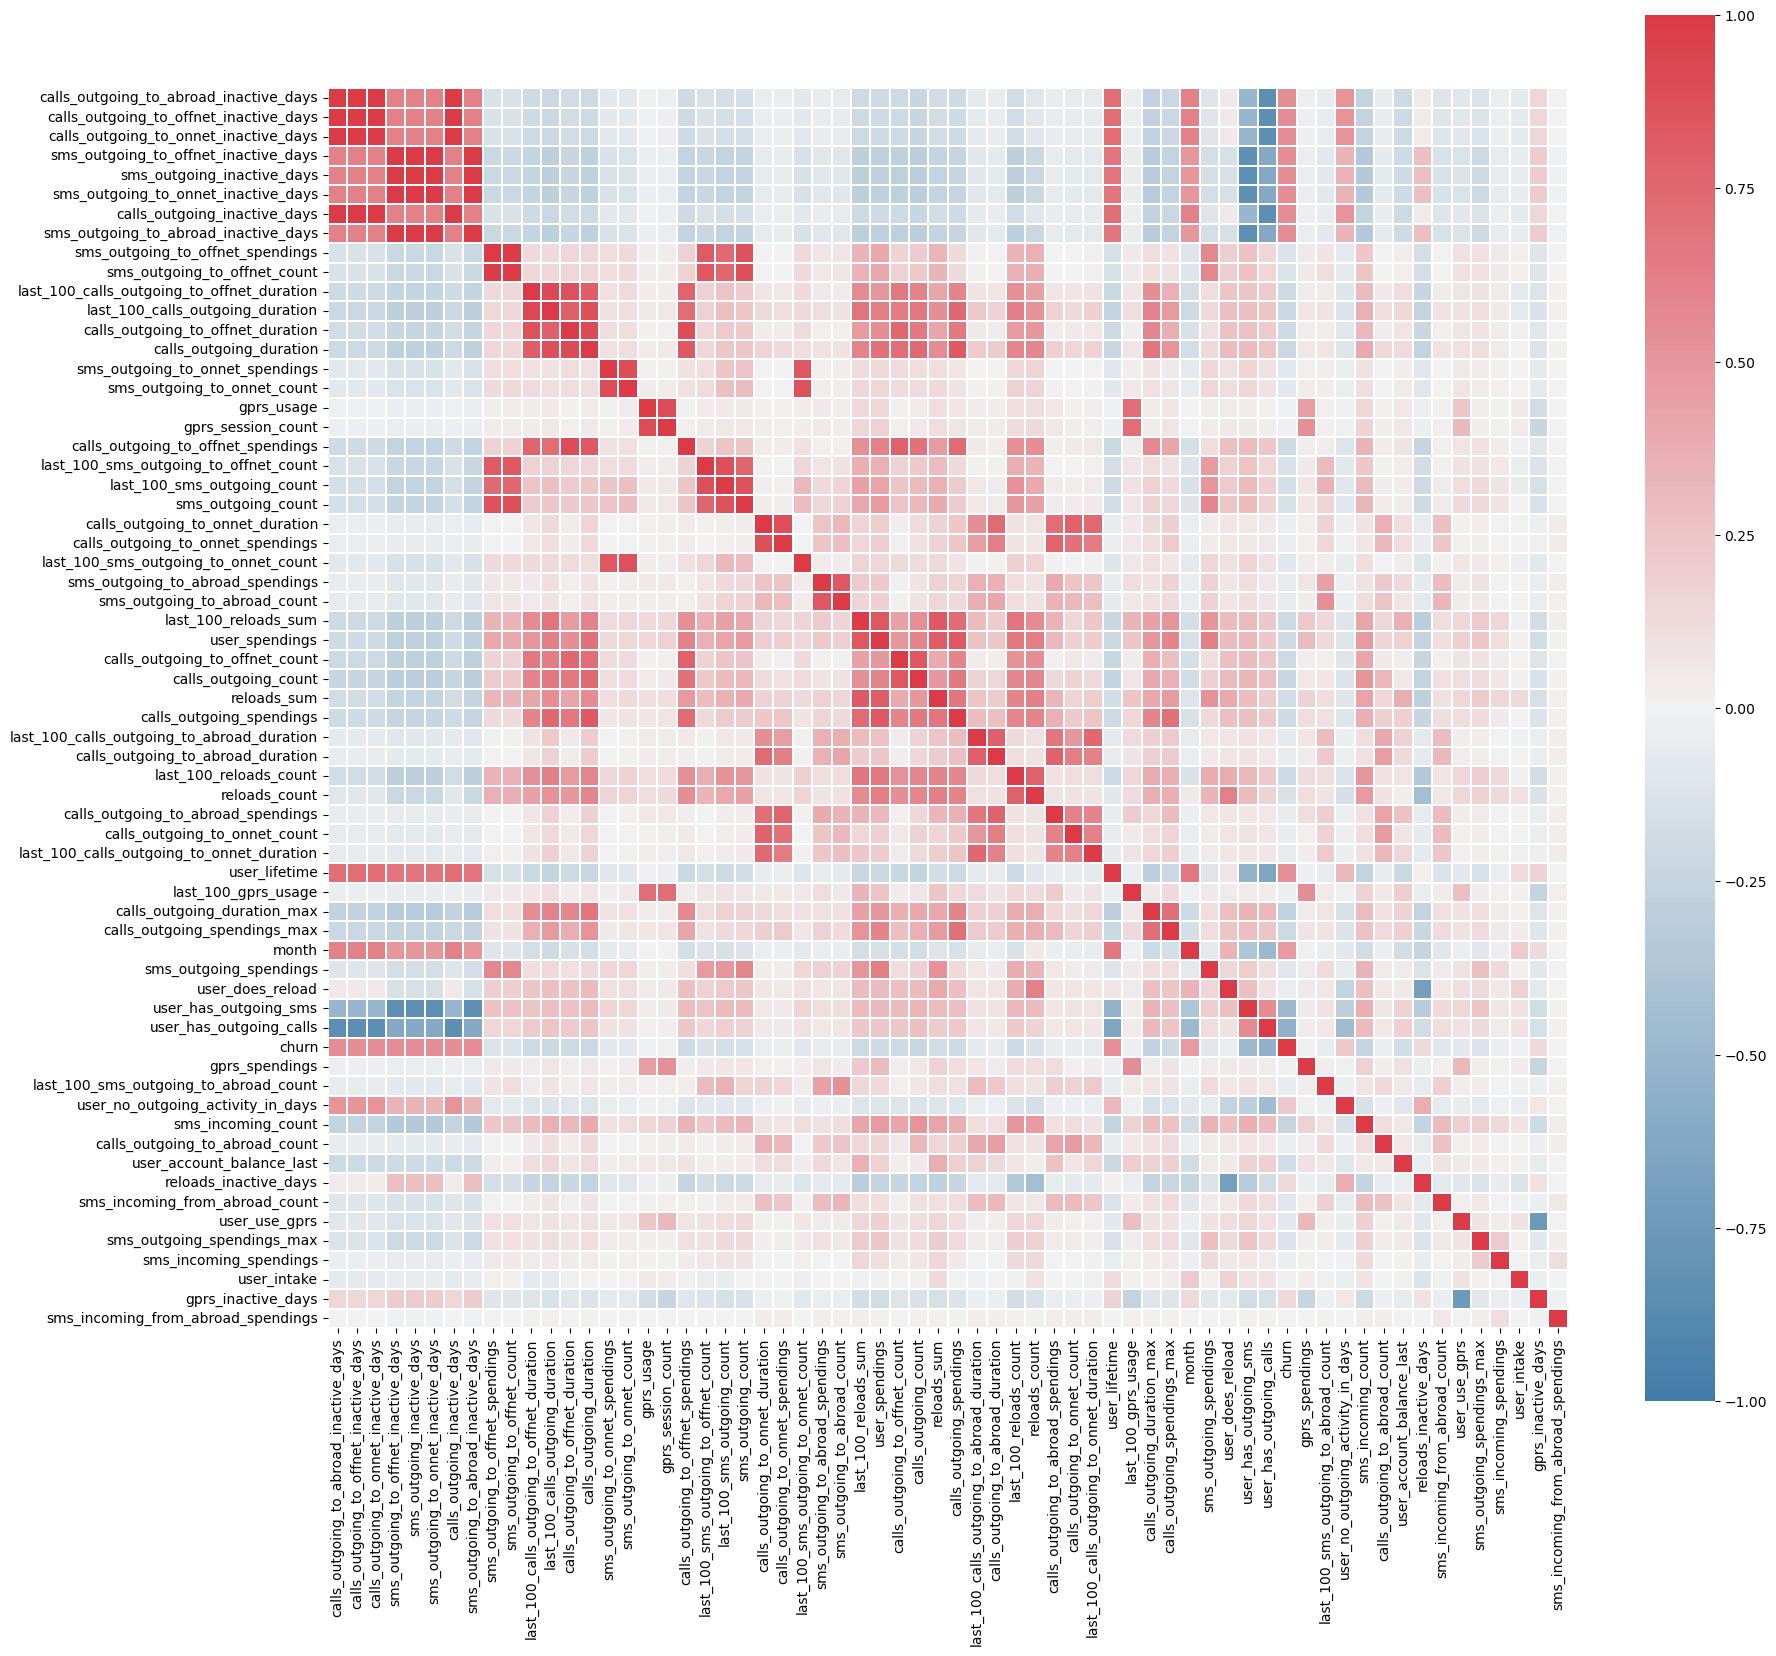

In [14]:
heatmap_corr(data, sort = True)

### AS FROM THE HEATMAP ABOVE WE CAN SEE THAT THERE ARE MULTIPLE COLUMNS WITH HIGH CORRELATION THREFORE WE WILL DROP COLUMNS THAT EXCEED THE 0.85 MARK.

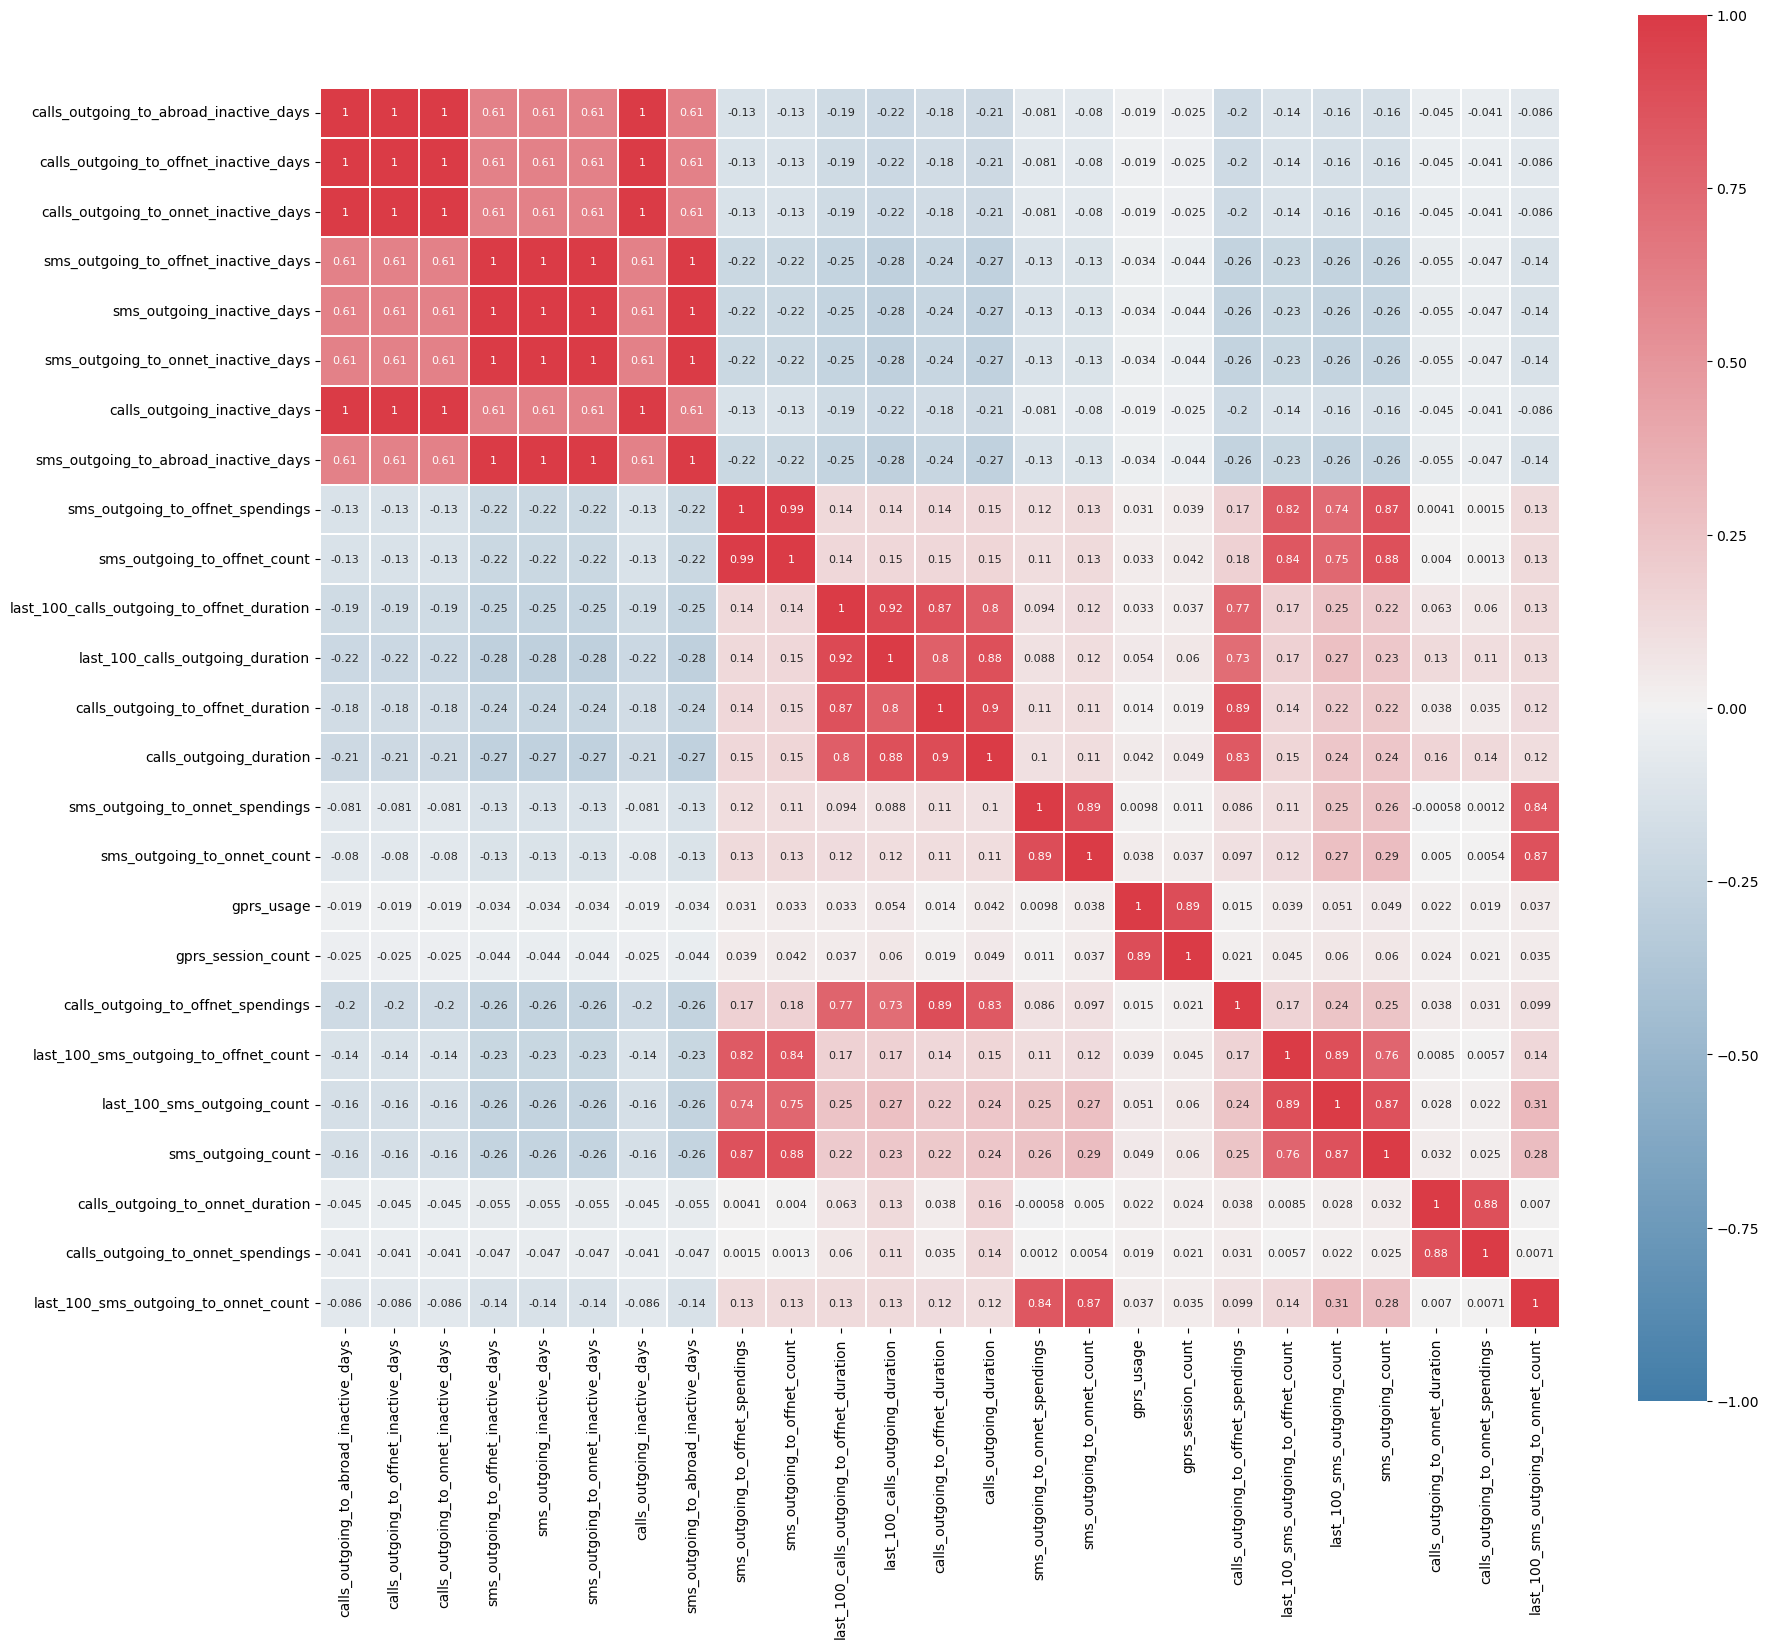

In [15]:
heatmap_corr(data, sort = True, annot = True, filtering = 0.85)

In [16]:
# GETTING THE COLUMN NAMES OF HIGHLY CORRELATED COLUMNS

cols1=[]
cols2=[]
corr_mat = data.corr()
value=[]

for i in range(len(corr_mat.columns)):
    for j in range(i):
        cols1.append(corr_mat.columns[i])
        cols2.append(corr_mat.columns[j])
        value.append(corr_mat.iloc[i,j])
        
        
corr_col = pd.DataFrame({'Feature Name 1': cols1, 'Feature Name 2': cols2, 'Correlation':value})
corr_col.sort_values('Correlation',ascending=False, inplace=True)
corr_col.reset_index(drop=True, inplace=True)
corr_col = corr_col[corr_col['Correlation'] > 0.85]
corr_col['Feature Name 1'].unique()

array(['calls_outgoing_to_abroad_inactive_days',
       'sms_outgoing_to_offnet_inactive_days',
       'calls_outgoing_to_onnet_inactive_days',
       'sms_outgoing_to_onnet_inactive_days',
       'sms_outgoing_to_abroad_inactive_days',
       'calls_outgoing_to_offnet_inactive_days',
       'sms_outgoing_to_offnet_spendings',
       'last_100_calls_outgoing_to_offnet_duration',
       'calls_outgoing_to_offnet_duration',
       'sms_outgoing_to_onnet_spendings', 'gprs_usage',
       'last_100_sms_outgoing_to_offnet_count',
       'last_100_calls_outgoing_duration', 'sms_outgoing_to_offnet_count',
       'calls_outgoing_to_onnet_duration', 'last_100_sms_outgoing_count',
       'last_100_sms_outgoing_to_onnet_count'], dtype=object)

### DROPPING ALL THE ABOVE COLUMNS

In [17]:
data.drop(['calls_outgoing_to_abroad_inactive_days',
       'sms_outgoing_to_offnet_inactive_days',
       'calls_outgoing_to_onnet_inactive_days',
       'sms_outgoing_to_onnet_inactive_days',
       'sms_outgoing_to_abroad_inactive_days',
       'calls_outgoing_to_offnet_inactive_days',
       'sms_outgoing_to_offnet_spendings',
       'last_100_calls_outgoing_to_offnet_duration',
       'calls_outgoing_to_offnet_duration',
       'sms_outgoing_to_onnet_spendings', 'gprs_usage',
       'last_100_sms_outgoing_to_offnet_count',
       'last_100_calls_outgoing_duration', 'sms_outgoing_to_offnet_count',
       'calls_outgoing_to_onnet_duration', 'last_100_sms_outgoing_count',
       'last_100_sms_outgoing_to_onnet_count'], inplace = True, axis =1)

-------------------------------------------------------

## EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='user_spendings', ylabel='Density'>

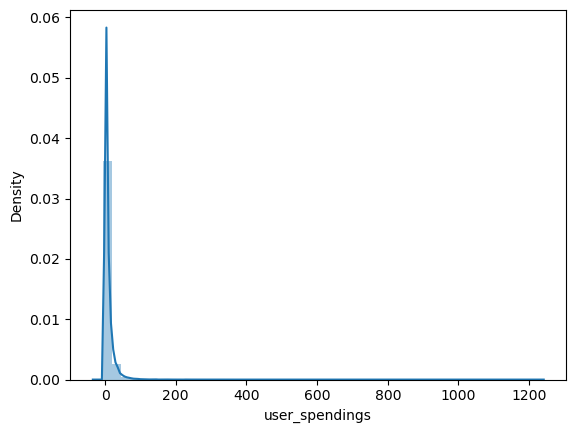

In [18]:
sns.distplot(data['user_spendings'])

#### Most of the users spend between 0 to 100

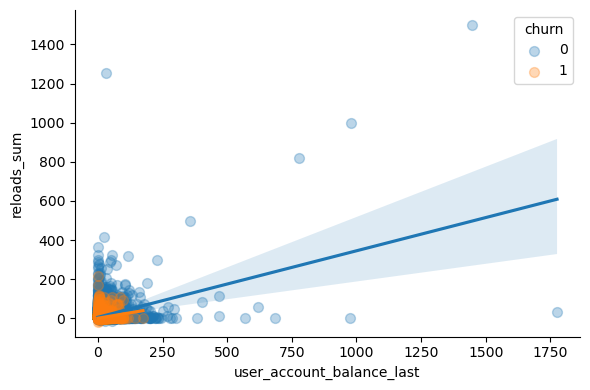

In [19]:
sns.lmplot(x='user_account_balance_last' , y='reloads_sum', data=data , hue='churn', height=4, aspect=1.5,legend_out=False,scatter_kws={"s": 50, "alpha":.3} )

## FROM THE GRAPH WE CAN SEE THAT IF THE USER WITH HIGH BALANCE ARE MOST LIKELY TO NOT CHURN AND USER WITH LOW BALANCE ARE MORE LIKELY TO CHURN.

[(0.0, 70.0)]

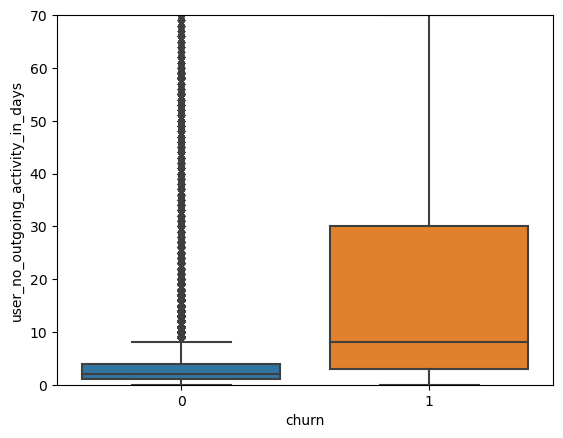

In [20]:
f, ax = plt.subplots()
sns.boxplot(data['churn'], data['user_no_outgoing_activity_in_days'], ax=ax)
ax.set(ylim=(0,70))

#### USERS WITH MORE NO OUTGOING ACTIVITY ARE MORE LIKELY TO CHURN

[(-100.0, 1500.0)]

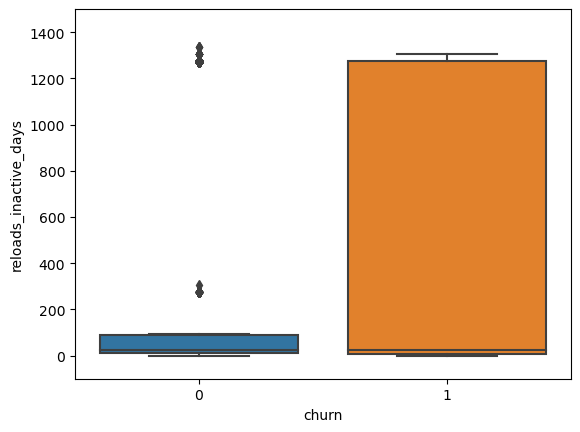

In [21]:
f, ax = plt.subplots()
sns.boxplot(data['churn'], data['reloads_inactive_days'], ax=ax)
ax.set(ylim=(-100,1500))

### FROM THE GRAPH WE CAN SEE THAT HIGHER THE REALOAD INACTIVE DAYS HIGHER THE CHURN RATE

<AxesSubplot:xlabel='user_lifetime', ylabel='Count'>

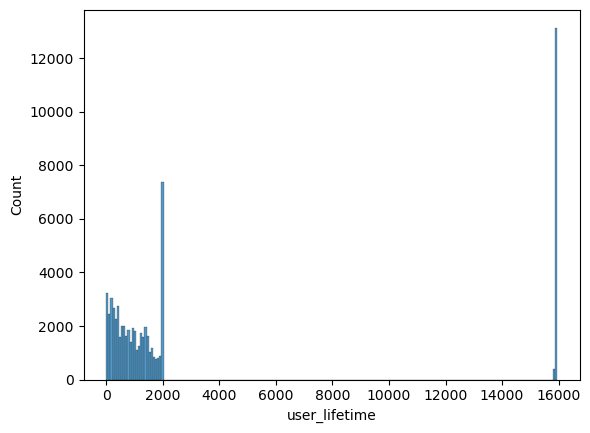

In [22]:
sns.histplot(data['user_lifetime'])

#### MANY USERS LIFETIME IS BETWEEN 0 TO 2000 OR 15947

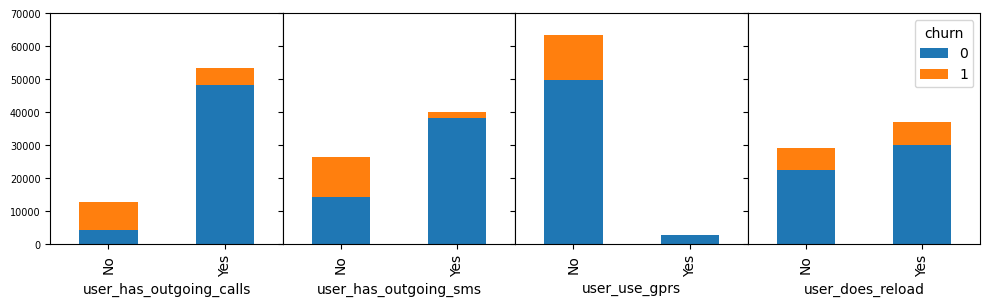

In [23]:
cat = data[['user_has_outgoing_calls', 'user_has_outgoing_sms', 'user_use_gprs', 'user_does_reload', 'churn']]

cat.user_has_outgoing_calls = cat.user_has_outgoing_calls.map({0:'No', 1:'Yes'})
cat.user_has_outgoing_sms = cat.user_has_outgoing_sms.map({0:'No', 1:'Yes'})
cat.user_use_gprs = cat.user_use_gprs.map({0:'No', 1:'Yes'})
cat.user_does_reload = cat.user_does_reload.map({0:'No', 1:'Yes'})
cat['indx'] = cat.index

user_has_outgoing_calls = cat.pivot_table('indx',index=['user_has_outgoing_calls'],columns='churn',aggfunc='count')
user_has_outgoing_sms  = cat.pivot_table('indx',index=['user_has_outgoing_sms'],columns='churn',aggfunc='count')
user_use_gprs = cat.pivot_table('indx',index=['user_use_gprs'],columns='churn',aggfunc='count')
user_does_reload = cat.pivot_table('indx',index=['user_does_reload'],columns='churn',aggfunc='count')

f, axes = plt.subplots(1,4,figsize=(12,3),sharey=True)
f.subplots_adjust(wspace=0)

tables = [user_has_outgoing_calls, user_has_outgoing_sms, user_use_gprs, user_does_reload]

i = 0
for table in tables:
    table.plot(kind='bar', ax=axes[i], stacked=True)
    axes[i].tick_params(axis='y', labelsize=7)
    axes[i].set(ylim=(0,70000))
    if i < 3 :
        axes[i].get_legend().remove()
    i+=1
    
plt.show()

### The column 'user_has_outgoing_calls' is a good determinant to classify churners and non-churners as the users with no outgoing calls are most likely to churn 
### If the user has outgoing sms and uses gprs, they are less likely to churn.
### user_does_reload variable doesn't separate well the target variable 'churn'

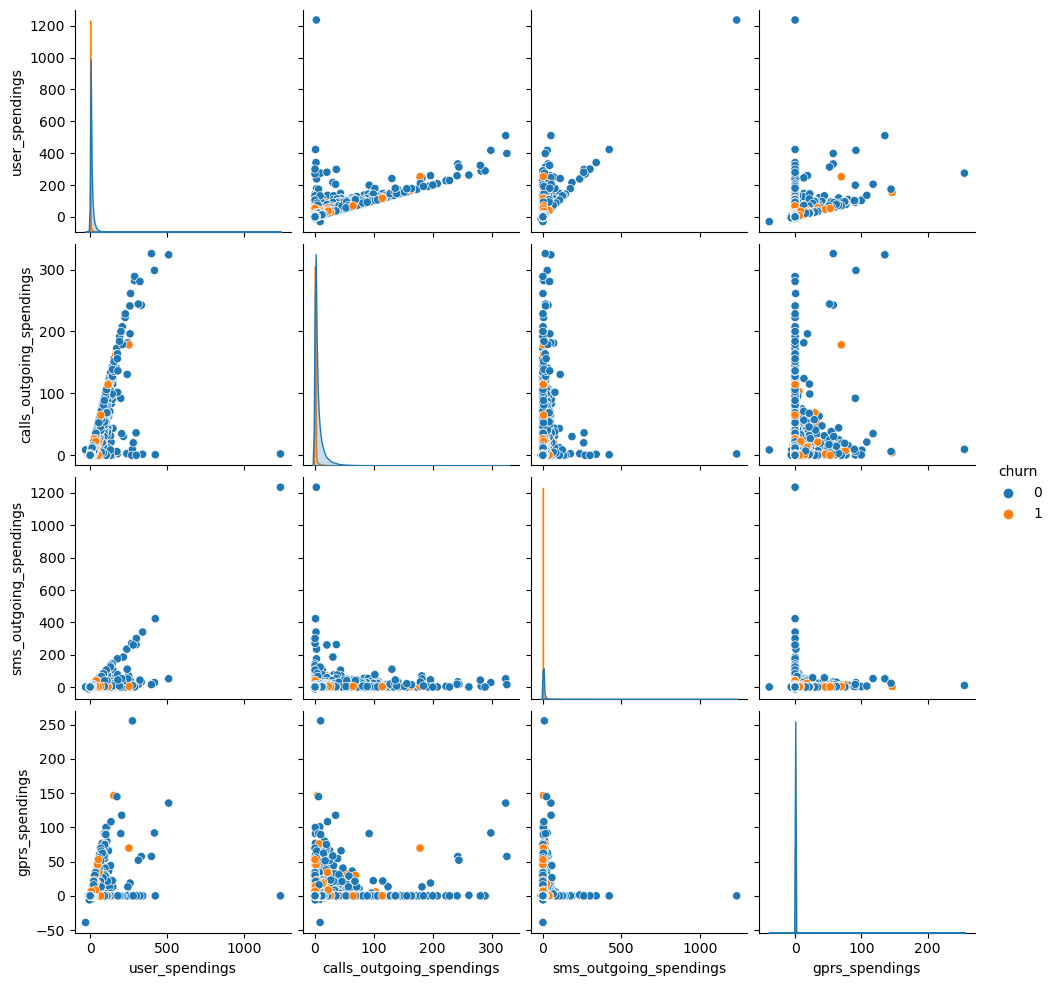

In [24]:
sns.pairplot(data[['user_spendings', 'calls_outgoing_spendings', 'sms_outgoing_spendings','gprs_spendings', 'churn']], hue='churn', size=2.5)

### FROM THE GRAPH WE CAN SEE THAT HIGH USER SPENDING SPECIFICALLY IN CALLS OUTGOING WORKS WELL IN DISTINGUISHING CHURNERS AND NON CHURNERS. SIMILAR PATTERNS CAN BE NOTICED FOR SMS AND GPRS OUTGOING SERVICES AS WELL.

<AxesSubplot:xlabel='churn', ylabel='Count'>

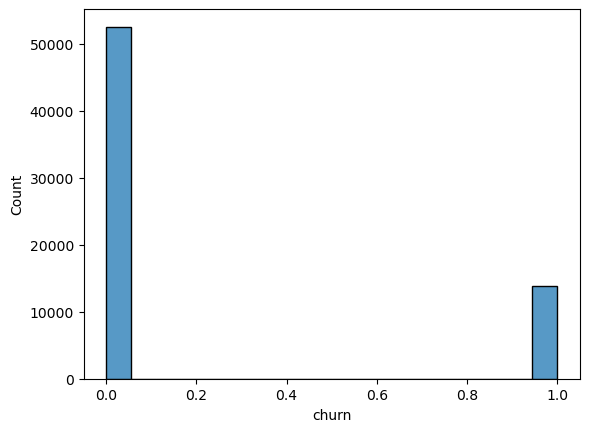

In [25]:
sns.histplot(data['churn'])

In [26]:
data['churn'].value_counts()

0    52562
1    13907
Name: churn, dtype: int64

### WE CAN SEE THAT OUR DATA IS IMBALANCED. WE HAVE APPLROX 52K NON CHURNERS AND 14K CHURNERS.

------------------------------

## TRAIN TEST SPLIT

In [27]:
# OUR DATA NOW LOOKS LIKE THIS 
data

,month,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,user_use_gprs,user_does_reload,...,gprs_session_count,gprs_spendings,gprs_inactive_days,last_100_reloads_count,last_100_reloads_sum,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
0,6,1000,0,1,0.05,0.00,1,1,0,0,...,0,0.0,1276,4,12.01,0.00,0.00,0,0.0,0
1,6,1000,0,25,28.31,3.45,1,0,0,0,...,0,0.0,1276,0,0.00,11.18,11.18,0,0.0,0
2,6,1005,0,8,15.62,1.97,1,0,0,0,...,0,0.0,1276,0,0.00,0.00,10.45,0,0.0,0
3,6,1013,0,11,5.62,0.00,1,0,0,0,...,0,0.0,1276,0,0.00,0.00,0.00,0,0.0,1
4,6,1032,0,2,5.86,0.15,1,0,0,1,...,0,0.0,1276,1,6.00,0.00,0.00,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66464,8,15947,0,1,0.00,0.00,0,0,0,1,...,0,0.0,1338,1,0.00,0.00,0.00,0,0.0,1
66465,8,15947,0,1,0.00,0.00,0,0,0,1,...,0,0.0,1338,1,0.00,0.00,0.00,0,0.0,1
66466,8,15947,0,1,15.00,0.00,0,0,0,1,...,0,0.0,1338,2,15.00,0.00,0.00,0,0.0,0
66467,8,15947,0,1,0.00,0.00,0,0,0,1,...,0,0.0,1338,1,0.00,0.00,0.00,0,0.0,0


#### WE HAVE 47 COLUMNS AND 66469 ROWS

### TRAIN TEST SPLIT

In [28]:
y = data['churn']
data.drop('churn',inplace=True, axis =1)
x = data

In [29]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)

### AFTER TRAIN TEST SPLIT WE HAVE APPROX 53K ROWS IN TRAIN DATASET AND 13K IN TEST DATASET

------------------------

## STANDARDIZING DATASET

In [30]:
train_scaler = StandardScaler()
x_train_std = train_scaler.fit_transform(x_train)

test_scaler = StandardScaler()
x_test_std = test_scaler.fit_transform(x_test)

---------------------

## DEALING WITH CLASS IMBALANCE

#### HERE WE HAVE 2 CHOICES WETHER TO UNDER SAMPLE OR OVERSAMPLE WE DO NOT WANT TO LOOSE OUR DATA SO WE GO WITH OVERSAMPLING. WE WILL DO OVERSAMPLING USING SMOTE USING THE IMBLEARN LIBRARY.

In [31]:
# BEFORE OVERSAMPLING X TRAIN SHAPE
np.shape(x_train_std)

(53175, 46)

In [32]:
# BEFORE OVERSAMPLING Y TRAIN SHAPE
np.shape(y_train)

(53175,)

In [33]:
# IMBALANCE IN OUR CLASSES BEFORE OVERSAMPLING

unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 42131]
 [    1 11044]]


In [34]:
# IMPLEMENTING SMOTE 

smote = SMOTE(sampling_strategy=0.6)
x_sm, y_sm = smote.fit_resample(x_train_std,y_train)

In [35]:
# AFTER OVERSAMPLING X TRAIN SHAPE

np.shape(x_sm)

(67409, 46)

In [36]:
# AFTER OVERSAMPLING Y TRAIN SHAPE

np.shape(y_sm)

(67409,)

In [36]:
# CLASSES AFTER OVERSAMPLING

unique, counts = np.unique(y_sm, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 42069]
 [    1 25241]]


#### SO AFTER IMPLEMENTING SMOTE OUR Y VARIABLE IS SOMEWHAT BALANCED.

---------------------------

---------------------

## IMPLEMENTING MODELS

In [37]:
MLA = [
    linear_model.LogisticRegressionCV(),
    naive_bayes.GaussianNB(),
    svm.SVC(kernel='rbf'),
    svm.LinearSVC(),
    tree.DecisionTreeClassifier(),
    ensemble.AdaBoostClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    XGBClassifier(),
    ]


cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['Name','Accuracy','Recall', 'Precision', 'F1_score']
MLA_compare = pd.DataFrame(columns = MLA_columns)


#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'Name'] = MLA_name
    #MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #scoring = ['accuracy','precision', 'recall', 'f1_weighted']
    scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
    
    cv_results = model_selection.cross_validate(alg, x_sm, y_sm,cv  = cv_split, scoring=scoring, n_jobs=-1)
    MLA_compare.loc[row_index, 'Fit Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'Accuracy'] = cv_results['test_accuracy'].mean()
    #print(cv_results['test_accuracy'].mean())
    MLA_compare.loc[row_index, 'Recall'] = cv_results['test_recall'].mean()
    MLA_compare.loc[row_index, 'Recall_STD'] = cv_results['test_recall'].std()
    MLA_compare.loc[row_index, 'Precision'] = cv_results['test_precision'].mean()
    MLA_compare.loc[row_index, 'F1_score'] = cv_results['test_f1_score'].mean()
    print(cv_results['fit_time'].mean(), '==>  ',MLA_name, 'is done!')
    
    row_index+=1
    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['Recall'], ascending = False, inplace = True)
MLA_compare

11.530449795722962 ==>   LogisticRegressionCV is done!
0.12039251327514648 ==>   GaussianNB is done!
264.0167973995209 ==>   SVC is done!
32.985474181175235 ==>   LinearSVC is done!
1.0513054132461548 ==>   DecisionTreeClassifier is done!
8.780153346061706 ==>   AdaBoostClassifier is done!
29.495968890190124 ==>   GradientBoostingClassifier is done!
10.107720589637756 ==>   RandomForestClassifier is done!
11.545465755462647 ==>   XGBClassifier is done!


,Name,Accuracy,Recall,Precision,F1_score,Fit Time,Recall_STD
1,GaussianNB,0.605641,0.936863,0.486759,0.640646,0.120393,0.002667
8,XGBClassifier,0.891844,0.8729,0.844155,0.858284,11.545466,0.002723
6,GradientBoostingClassifier,0.873733,0.841417,0.82545,0.833349,29.495969,0.003446
4,DecisionTreeClassifier,0.842619,0.832056,0.767891,0.798679,1.051305,0.005335
7,RandomForestClassifier,0.879909,0.827928,0.848359,0.838011,10.107721,0.005422
5,AdaBoostClassifier,0.847249,0.799255,0.794785,0.797005,8.780153,0.004502
0,LogisticRegressionCV,0.835096,0.747618,0.799836,0.772827,11.530450,0.005838
2,SVC,0.837488,0.733954,0.814735,0.772005,264.016797,0.021545
3,LinearSVC,0.833224,0.72059,0.813636,0.764222,32.985474,0.012972


#### The best model is an XGBoost model. We can see that Ensemble models preform way better than classical models.

### HYPERPARAMETER TUNING IN XGBOOST

In [37]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_sm, y_sm), ( x_test_std, y_test)]
    
    clf.fit(x_sm, y_sm,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test_std)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }


trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

In [42]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.8089155823952671, 'gamma': 3.6234496305484205, 'max_depth': 8.0, 'min_child_weight': 8.0, 'reg_alpha': 130.0, 'reg_lambda': 0.22308525844193836}


In [73]:
# BEST PARAMETERS WE GET ARE

params = {'colsample_bytree': 0.8089155823952671,
          'gamma': 3.6234496305484205,
          'max_depth': 8, 
          'min_child_weight': 8,
          'reg_alpha': 130.0,
          'reg_lambda': 0.22308525844193836,
          'objective': 'binary:logistic',  # Corrected the objective for binary classification    
          'eval_metric': 'logloss',  # Use 'logloss' for binary classification    
          'random_state': 42}

#### TRAINING XGBOOST WITH BEST PARAMETERS ON WHOLE TRAINING DATASET

In [80]:
XGB = xgb.XGBClassifier(**params)

In [81]:
XGB.fit(x_sm, y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8089155823952671, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3.6234496305484205, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [82]:
# TRAINING ACCURACY
XGB.score(x_sm, y_sm)

0.8733106855167707

In [83]:
# TEST ACCURACY
XGB.score(x_test_std, y_test)

0.8040469384684821

In [84]:
y_predict = XGB.predict(x_test_std)
y_true = pd.Series(y_test).map({0:'No', 1:'Yes'}).to_numpy()
y_pred = pd.Series(y_predict).map({0:'No', 1:'Yes'}).to_numpy()
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

          No       0.95      0.79      0.86     10431
         Yes       0.53      0.85      0.65      2863

    accuracy                           0.80     13294
   macro avg       0.74      0.82      0.76     13294
weighted avg       0.86      0.80      0.82     13294



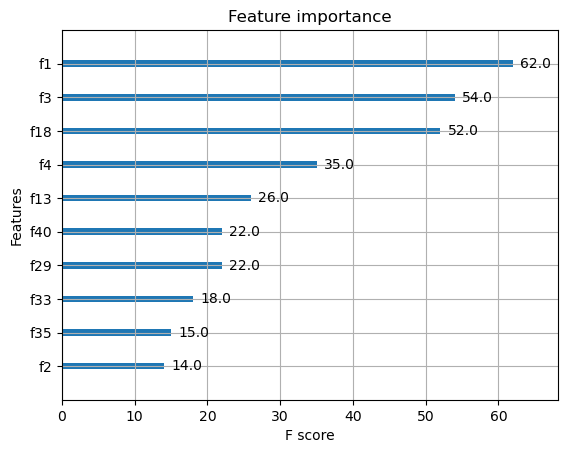

In [85]:
plot_importance(XGB,max_num_features=10)
plt.show()

In [89]:
# MOST IMPORTANT FEATURES WE GET ARE

ls = [1,3,18,4,13,40,29,33,35,2]
i = 0
for col in data.columns:
    if i in ls:
        print(col)
    i = i + 1

user_lifetime
user_intake
user_no_outgoing_activity_in_days
user_account_balance_last
calls_outgoing_count
calls_outgoing_inactive_days
sms_outgoing_inactive_days
sms_incoming_count
sms_incoming_from_abroad_count
last_100_reloads_count


## The above classification using ensemble learning algorithms, such as XGBoost, performed the best in predicting customer churn with an test accuracy of 80.4%. The XGBClassifier model effectively identified churners and non-churners. The top relevant feature in predicting customer churn rate are user_lifetime, user_intake, user_no_outgoing_activity_in_days, user_account_balance_last and calls_outgoing_count.